In [31]:
import pandas as pd
import numpy as np

# Load purchase data from the Excel file
purchase_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='Purchase data')

# Define the items and load their data
items = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
items_data = pd.read_excel(r"D:\Lab Session Data.xlsx", usecols=items)

# Define the payment and load the data
payment = ['Payment (Rs)']
payment_data = pd.read_excel(r"D:\Lab Session Data.xlsx", usecols=payment)

# Get the number of columns and rows in the items data
num_item_columns = items_data.shape[1]
num_item_rows = items_data.shape[0]

# Compute the matrix rank and pseudo-inverse for the items data
items_data_matrix_rank = np.linalg.matrix_rank(items_data)
items_data_pseudo_inverse = np.linalg.pinv(items_data)

# Print out the results
print("The number of item columns is", num_item_columns)
print("The number of item rows is", num_item_rows)
print("The matrix rank of the items data is", items_data_matrix_rank)


The number of item columns is 3
The number of item rows is 10
The matrix rank of the items data is 3


In [3]:
# Calculate the cost of each product using the pseudo-inverse and payment data
product_costs = np.dot(items_data_pseudo_inverse, payment_data)
print("The cost of each product available is", product_costs)


The cost of each product available is [[ 1.]
 [55.]
 [18.]]


In [5]:
import pandas as pd
import numpy as np

# Load data from Excel sheet
purchase_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='Purchase data')

# Add status based on payment amount
purchase_data['Payment Status'] = purchase_data['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR")

# Print the results
print(purchase_data[['Payment (Rs)', 'Payment Status']].head())


   Payment (Rs) Payment Status
0           386           RICH
1           289           RICH
2           393           RICH
3           110           POOR
4           280           RICH


The mean of the price is  1560.663453815261
The variance in price is  58732.365352539186
The mean price on Wednesdays is  1550.706
The difference between the mean price and the mean price on Wednesdays is  9.957453815261033
The mean price in April is  1698.9526315789474
The difference between the mean price and the mean price in April is  -138.28917776368644
Probability of making a profit on Wednesday 0.42
The probability of profit given it is Wednesday is  0.08433734939759036


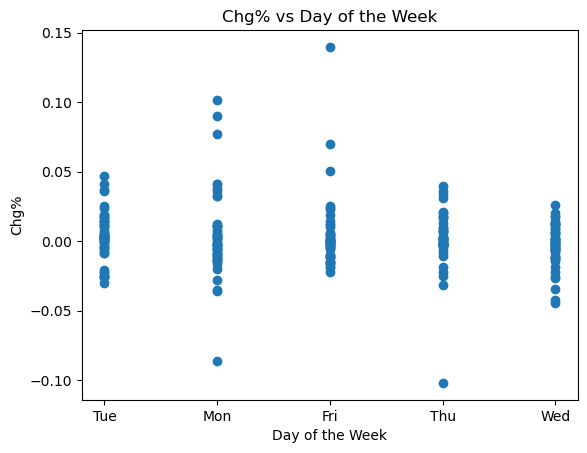

In [27]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel sheet
stock_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='IRCTC Stock Price')

# Calculate mean and variance of stock price
price_data = stock_data['Price']
mean_price = statistics.mean(price_data)
price_variance = statistics.variance(price_data)
print("The mean of the price is ", mean_price)
print("The variance in price is ", price_variance)

# Filter data for Wednesdays and calculate mean price on Wednesdays
wednesday_data = stock_data[stock_data['Day'] == 'Wed']
mean_wednesday_price = statistics.mean(wednesday_data['Price'])
print("The mean price on Wednesdays is ", mean_wednesday_price)
print("The difference between the mean price and the mean price on Wednesdays is ", mean_price - mean_wednesday_price)

# Filter data for April and calculate mean price in April
april_data = stock_data[stock_data['Month'] == 'Apr']
mean_april_price = statistics.mean(april_data['Price'])
print("The mean price in April is ", mean_april_price)
print("The difference between the mean price and the mean price in April is ", mean_price - mean_april_price)

# Calculate probability of profit on Wednesdays
wednesday_profit_prob = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)
print("Probability of making a profit on Wednesday", wednesday_profit_prob)

# Calculate conditional probability of profit given it is Wednesday
probability_wednesday = len(wednesday_data) / len(stock_data)
conditional_profit_prob = wednesday_profit_prob * probability_wednesday
print("The probability of profit given it is Wednesday is ", conditional_profit_prob)

# Plot the data
plt.scatter(stock_data['Day'], stock_data['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.show()


Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

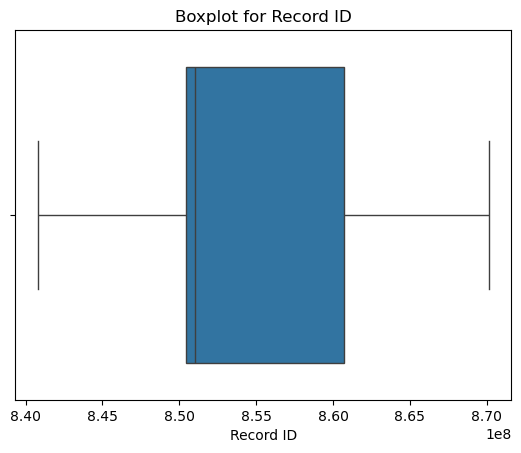

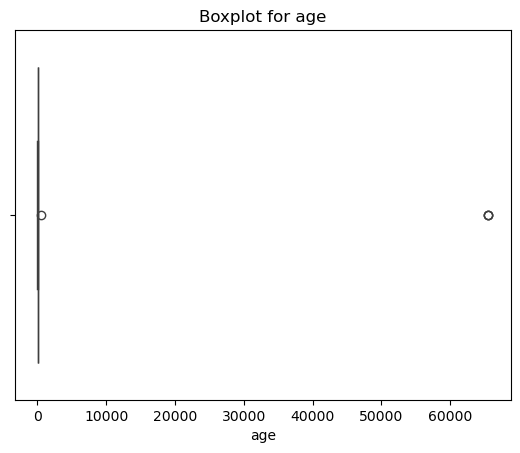

Mean and std. deviation for Record ID is 852947346.6122983 and 7581968.780346589
Mean and std. deviation for age is 73.55582206716092 and 1183.9767180444667


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel sheet
thyroid_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
print(thyroid_data.dtypes)

# Identify categorical and numeric columns
categorical_cols = thyroid_data.select_dtypes(include=['object']).columns
numeric_cols = thyroid_data.select_dtypes(include=['int64']).columns

# Handle categorical columns
for col in categorical_cols:
    unique_values = thyroid_data[col].unique()
    print("Unique values in column", col, " ", unique_values)

    if len(unique_values) < 100:
        print(f"Suggested Encoding: Label Encoding")
        thyroid_data[col] = thyroid_data[col].astype('category').cat.codes
    else:
        print(f"Suggested Encoding: One-Hot Encoding")
        thyroid_data = pd.get_dummies(thyroid_data, columns=[col], prefix=[col])

# Display range for numeric attributes
for col in numeric_cols:
    print("Data range for numeric attribute", col, "is", thyroid_data[col].min(), "to", thyroid_data[col].max())

# Replace missing values marked as '?' with NaN
thyroid_data.replace('?', np.nan, inplace=True)

# Print number of missing values in each feature
print("Number of missing values in each feature:")
missing_values_count = thyroid_data.isnull().sum()
print(missing_values_count)

# Display boxplots for numeric data to check for outliers
print("\nOutliers in Numeric Data:")
for col in numeric_cols:
    sns.boxplot(x=thyroid_data[col])
    plt.title("Boxplot for {}".format(col))
    plt.show()

# Print mean and standard deviation for numeric attributes
for col in numeric_cols:
    print("Mean and std. deviation for", col, "is", thyroid_data[col].mean(), "and", thyroid_data[col].std())


Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

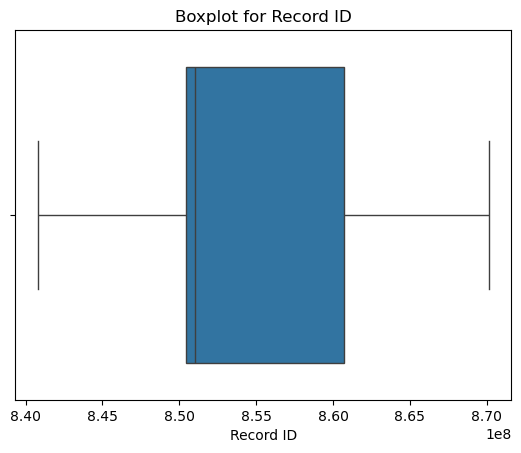

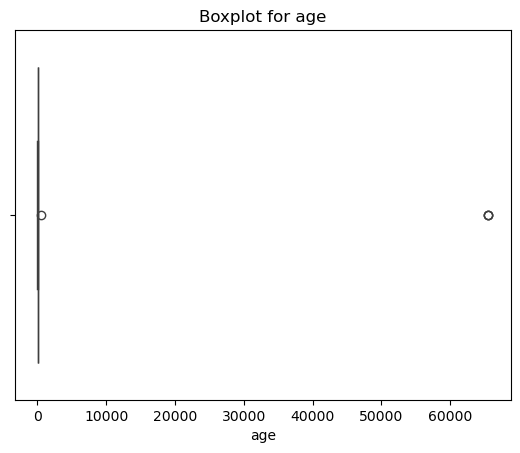

Mean and std. deviation for Record ID is 852947346.6122983 and 7581968.780346589
Mean and std. deviation for age is 73.55582206716092 and 1183.9767180444667


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel sheet
thyroid_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
print(thyroid_data.dtypes)

# Identify categorical and numeric columns
categorical_cols = thyroid_data.select_dtypes(include=['object']).columns
numeric_cols = thyroid_data.select_dtypes(include=['int64']).columns

# Handle categorical columns
for col in categorical_cols:
    unique_values = thyroid_data[col].unique()
    print("Unique values in column", col, " ", unique_values)

    if len(unique_values) < 100:
        print(f"Suggested Encoding: Label Encoding")
        thyroid_data[col] = thyroid_data[col].astype('category').cat.codes
    else:
        print(f"Suggested Encoding: One-Hot Encoding")
        thyroid_data = pd.get_dummies(thyroid_data, columns=[col], prefix=[col])

# Display range for numeric attributes
for col in numeric_cols:
    print("Data range for numeric attribute", col, "is", thyroid_data[col].min(), "to", thyroid_data[col].max())

# Replace missing values marked as '?' with NaN
thyroid_data.replace('?', np.nan, inplace=True)

# Print number of missing values in each feature
print("Number of missing values in each feature:")
missing_values_count = thyroid_data.isnull().sum()
print(missing_values_count)

# Display boxplots for numeric data to check for outliers
print("\nOutliers in Numeric Data:")
for col in numeric_cols:
    sns.boxplot(x=thyroid_data[col])
    plt.title("Boxplot for {}".format(col))
    plt.show()

# Print mean and standard deviation for numeric attributes
for col in numeric_cols:
    print("Mean and std. deviation for", col, "is", thyroid_data[col].mean(), "and", thyroid_data[col].std())


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas option to avoid silent downcasting warning
pd.set_option('future.no_silent_downcasting', True)

# Load the data from the Excel fille
thyroid_data = pd.read_excel("C:/Users/yogendra/Downloads/Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)

# Select numerical columns
numeric_cols_thyroid = thyroid_data.select_dtypes(include=['int64']).columns

# Impute missing values in numerical columns
for col in numeric_cols_thyroid:
    if thyroid_data[col].isnull().sum() > 0:
        if thyroid_data[col].skew() < 1:
            thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mean())
            print("Column: {}, Imputation Method: Mean".format(col))
        else:
            thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].median())
            print("Column: {}, Imputation Method: Median".format(col))

# Select categorical columns
categorical_cols_thyroid = thyroid_data.select_dtypes(include=['object']).columns

# Impute missing values in categorical columns
for col in categorical_cols_thyroid:
    if thyroid_data[col].isnull().sum() > 0:
        thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mode()[0])
        print("Column: {}, Imputation Method: Mode".format(col))


Column: sex, Imputation Method: Mode
Column: TSH, Imputation Method: Mode
Column: T3, Imputation Method: Mode
Column: TT4, Imputation Method: Mode
Column: T4U, Imputation Method: Mode
Column: FTI, Imputation Method: Mode
Column: TBG, Imputation Method: Mode


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data from Excel sheet
thyroid_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')

# Identify numeric columns
numeric_cols_thyroid = thyroid_data.select_dtypes(include=['int64']).columns

# Display descriptive statistics for numeric columns
print(thyroid_data[numeric_cols_thyroid].describe())

# Standardize the 'age' column
scaler = StandardScaler()
thyroid_data['age'] = scaler.fit_transform(thyroid_data[['age']])

print("Z-score Normalized 'age' Column:")
print(thyroid_data['age'])


          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000
Z-score Normalized 'age' Column:
0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64


In [39]:
import pandas as pd
import numpy as np

# Set pandas option to avoid silent downcasting warning
pd.set_option('mode.chained_assignment', None)  # Suppresses SettingWithCopyWarning

# Load and preprocess data from 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)
print("For thyroid data sheet")

# Identify binary columns in thyroid data
binary_cols_thyroid = [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols_thyroid += [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'M', 'F'}]

# Replace binary values with 0 and 1
thyroid_data[binary_cols_thyroid] = thyroid_data[binary_cols_thyroid].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

# Calculate Jaccard and Simple Matching Coefficient for thyroid data
vector1_thyroid = thyroid_data.loc[0, binary_cols_thyroid].astype(int)
vector2_thyroid = thyroid_data.loc[1, binary_cols_thyroid].astype(int)

f11_thyroid = np.sum((vector1_thyroid == 1) & (vector2_thyroid == 1))
f00_thyroid = np.sum((vector1_thyroid == 0) & (vector2_thyroid == 0))
f10_thyroid = np.sum((vector1_thyroid == 1) & (vector2_thyroid == 0))
f01_thyroid = np.sum((vector1_thyroid == 0) & (vector2_thyroid == 1))

jc_thyroid = f11_thyroid / (f01_thyroid + f10_thyroid + f11_thyroid)
smc_thyroid = (f11_thyroid + f00_thyroid) / (f00_thyroid + f01_thyroid + f10_thyroid + f11_thyroid)

print("Jaccard Coefficient (JC) for thyroid data sheet:", jc_thyroid)
print("Simple Matching Coefficient (SMC) for thyroid data sheet:", smc_thyroid)

# Load and preprocess data from 'marketing_campaign' sheet
marketing_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='marketing_campaign')
marketing_data.replace('?', np.nan, inplace=True)
print("For marketing data sheet")

# Identify binary columns in marketing data
binary_cols_marketing = [col for col in marketing_data.columns if set(marketing_data[col].dropna().unique()) <= {0, 1}]

# Calculate Jaccard and Simple Matching Coefficient for marketing data
marketing_data[binary_cols_marketing] = marketing_data[binary_cols_marketing]

vector1_marketing = marketing_data.loc[0, binary_cols_marketing].astype(int)
vector2_marketing = marketing_data.loc[1, binary_cols_marketing].astype(int)

f11_marketing = np.sum((vector1_marketing == 1) & (vector2_marketing == 1))
f00_marketing = np.sum((vector1_marketing == 0) & (vector2_marketing == 0))
f10_marketing = np.sum((vector1_marketing == 1) & (vector2_marketing == 0))
f01_marketing = np.sum((vector1_marketing == 0) & (vector2_marketing == 1))

jc_marketing = f11_marketing / (f01_marketing + f10_marketing + f11_marketing)
smc_marketing = (f11_marketing + f00_marketing) / (f00_marketing + f01_marketing + f10_marketing + f11_marketing)

print("Jaccard Coefficient (JC) for marketing data sheet:", jc_marketing)
print("Simple Matching Coefficient (SMC) for marketing data sheet:", smc_marketing)


For thyroid data sheet
Jaccard Coefficient (JC) for thyroid data sheet: 0.25
Simple Matching Coefficient (SMC) for thyroid data sheet: 0.8571428571428571
For marketing data sheet
Jaccard Coefficient (JC) for marketing data sheet: 0.0
Simple Matching Coefficient (SMC) for marketing data sheet: 0.8571428571428571


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load and preprocess data from 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)

# Initialize label encoders for categorical columns
label_encoders = {}
for col in thyroid_data.select_dtypes(include=['object']).columns:
    if thyroid_data[col].isnull().sum() > 0:
        thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mode()[0])
    encoder = LabelEncoder()
    thyroid_data[col] = encoder.fit_transform(thyroid_data[col])
    label_encoders[col] = encoder

# Fill missing values in numerical columns with mean
for col in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mean())

# Compute cosine similarity between the first and second rows
vector1 = thyroid_data.iloc[0].values.reshape(1, -1)
vector2 = thyroid_data.iloc[1].values.reshape(1, -1)

cosine_similarity_value = cosine_similarity(vector1, vector2)[0][0]

print("Cosine Similarity:", cosine_similarity_value)


Cosine Similarity: 0.9999999999999943


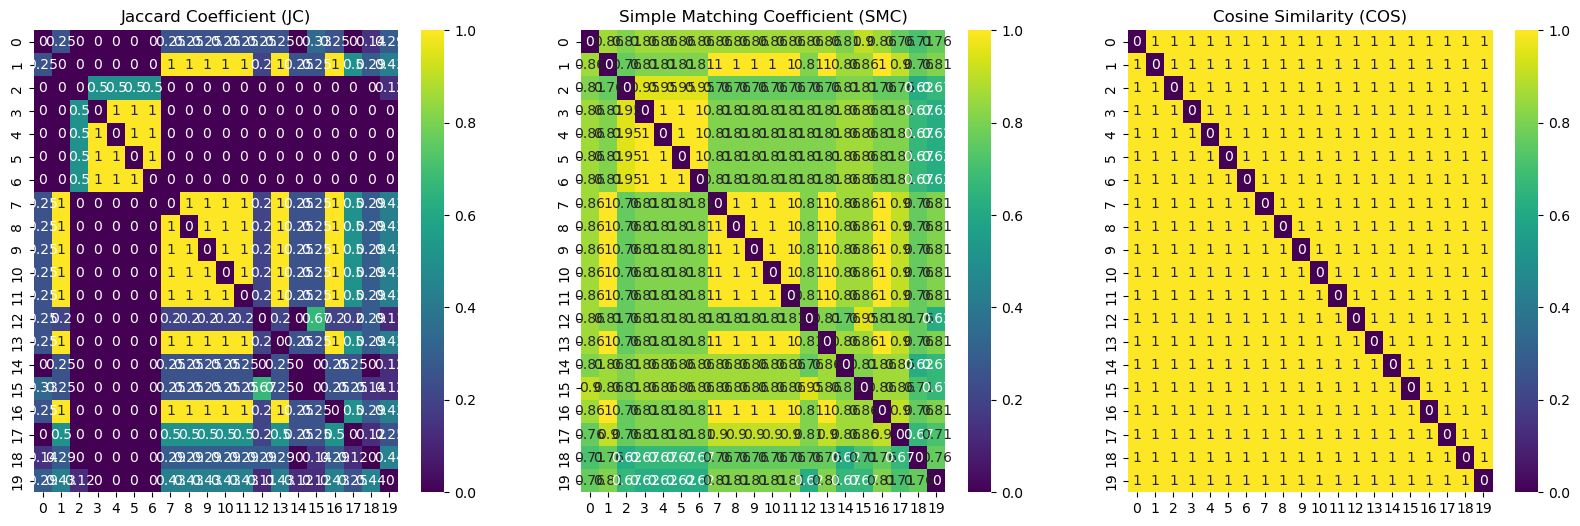

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data from 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel(r"D:\Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)

# Identify binary columns
binary_cols_thyroid = [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols_thyroid += [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'M', 'F'}]

# Replace binary values with 0 and 1
thyroid_data[binary_cols_thyroid] = thyroid_data[binary_cols_thyroid].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

# Label encode and impute missing values
label_encoders = {}
for column in thyroid_data.select_dtypes(include=['object']).columns:
    if thyroid_data[column].isnull().sum() > 0:
        thyroid_data[column] = thyroid_data[column].fillna(thyroid_data[column].mode()[0])
    encoder = LabelEncoder()
    thyroid_data[column] = encoder.fit_transform(thyroid_data[column])
    label_encoders[column] = encoder

for column in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[column] = thyroid_data[column].fillna(thyroid_data[column].mean())

# Create matrices to store similarity measures
subset_thyroid_data = thyroid_data.iloc[:20]
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculate similarity measures
for i in range(20):
    for j in range(20):
        if i != j:
            vector1 = subset_thyroid_data.iloc[i, :].values
            vector2 = subset_thyroid_data.iloc[j, :].values

            binary_vector1 = subset_thyroid_data.loc[i, binary_cols_thyroid].astype(int)
            binary_vector2 = subset_thyroid_data.loc[j, binary_cols_thyroid].astype(int)

            f11 = np.sum((binary_vector1 == 1) & (binary_vector2 == 1))
            f00 = np.sum((binary_vector1 == 0) & (binary_vector2 == 0))
            f10 = np.sum((binary_vector1 == 1) & (binary_vector2 == 0))
            f01 = np.sum((binary_vector1 == 0) & (binary_vector2 == 1))

            jc_matrix[i, j] = f11 / (f01 + f10 + f11)
            smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)

            vector1_all = vector1.reshape(1, -1)
            vector2_all = vector2.reshape(1, -1)
            cosine_matrix[i, j] = cosine_similarity(vector1_all, vector2_all)[0][0]

# Plot the heatmaps
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(jc_matrix, annot=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Jaccard Coefficient (JC)')

sns.heatmap(smc_matrix, annot=True, cmap='viridis', ax=axs[1])
axs[1].set_title('Simple Matching Coefficient (SMC)')

sns.heatmap(cosine_matrix, annot=True, cmap='viridis', ax=axs[2])
axs[2].set_title('Cosine Similarity (COS)')

plt.show()
